# <mobile_price 데이터 셋을 이용한 SVM 실습>
## 휴대폰의 여러가지 특성을 기반으로 가격 범위를 예측하는 분류 실습입니다. 

다음은 mobile_price.csv 데이터에 대한 설명 입니다.

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not	
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes	
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor	
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Megabytes
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not

<br>
더 자세한 데이터 정보는 https://www.kaggle.com/iabhishekofficial/mobile-price-classification 에서 확인하시면 됩니다.





In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### 1. mobile_price.csv 데이터 셋을 가져와서 처음 5개 행을 확인하시오.

In [5]:
mp = pd.read_csv('mobile_price.csv')
mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### 2. info() 함수를 이용해 데이터프레임의 기본 정보를 확인하시오.

In [6]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### 3. describe() 함수를 이용해 Target 칼럼 'price_range'의 정보를 확인하시오.

In [8]:
mp['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

### 4. unique()함수를 이용해 Target 클래스의 종류를 확인하시오.

In [9]:
mp['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

### 5. 피처 간 상관관계를 분석하시오.

<AxesSubplot:>

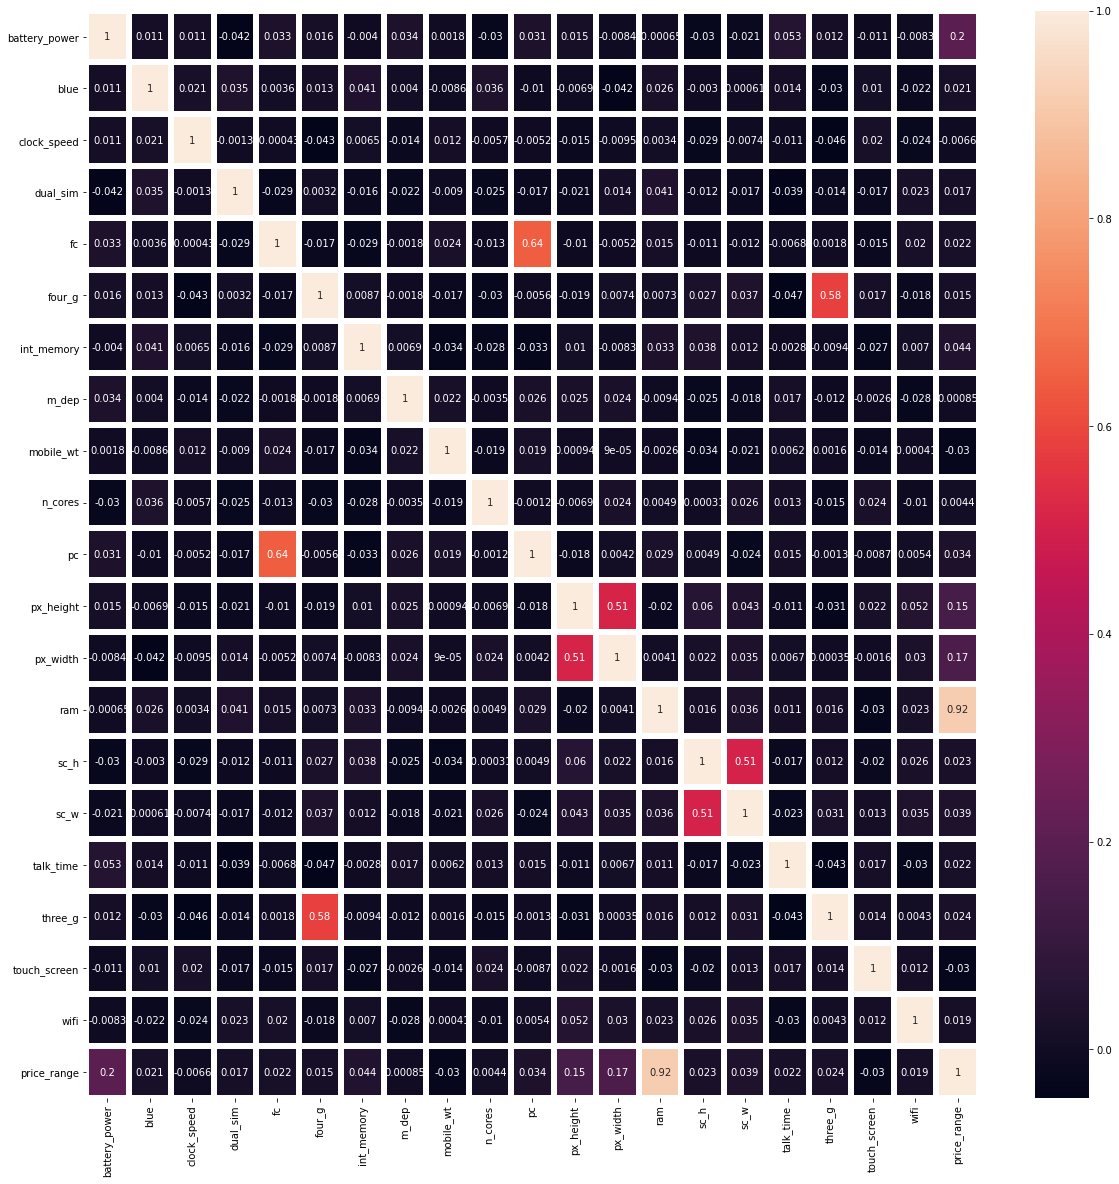

In [16]:
plt.rcParams['figure.figsize'] = [20, 20]
sns.heatmap(mp.corr(), annot=True,linewidths=5)

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### 6. 데이터의 타깃 칼럼을 분리해, X_mobile과 y_mobile으로 저장하시오

In [35]:
X_mobile=mp.drop(['price_range'], axis=1)
y_mobile=mp['price_range']
X_mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


### 7. 피처에 대해 MinMaxScaler()를 이용해 스케일링을 진행하시오.

In [37]:
#최대/최소값이 각각 1, 0이 되도록 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
mp_scaled = scaler.fit_transform(X_mobile)

### 8. train_test_split를 사용하여 train 셋과 test 셋을 분리하시오
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 42

In [38]:
x = mp_scaled

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y_mobile,test_size = 0.2,random_state=42)

### 9. 선형 SVC 모델 (kernel: linear, C: 20) 을 만들어 fit 시키시오.

In [41]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',C=20)
clf=classifier.fit(X_train,y_train)
clf

SVC(C=20, kernel='linear')

### 10. cross_val_score(cv=5)를 이용하여 CV점수를 출력하고 그 평균값을 구하시오.

In [40]:
from sklearn.model_selection import cross_val_score

In [45]:
scores = cross_val_score(clf,X_train,y_train,cv=5)
print(scores)
sum(scores)/5

[0.95     0.9625   0.95     0.925    0.971875]


0.9518749999999999

### 11. 가우시안 RBF 커널을 사용해서 SVM 모델을 만들어 보시오. <br>그리고 지난 과제를 참고하여 GridSearchCV(cv=5)를 사용해서<br> Gamma와 C의 최적 파라미터를 찾고 best parameter, best score를 출력하시오.

```python
params = {
    'gamma':[.1, .25, .5, 1],       
    'C': [1,5,10,20,40,100]
}
```

In [46]:
params = {
    'gamma':[.1, .25, .5, 1],       
    'C': [1,5,10,20,40,100]
}

In [47]:
from sklearn.model_selection import GridSearchCV
# GridSearch
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20, 40, 100],
                         'gamma': [0.1, 0.25, 0.5, 1]})

In [48]:
grid_search.best_params_, grid_search.best_score_

({'C': 10, 'gamma': 0.1}, 0.903125)

### 12. 위에서 구한 최적 파라미터를 rbf 모델에 적용하여 테스트 데이터에 대한 최종 예측을 출력하시오.

In [54]:
svr2 = SVC(kernel = 'rbf',C=10,gamma=0.1).fit(X_train,y_train)
pred=svr2.predict(X_test)
pred

array([0, 2, 1, 3, 1, 1, 1, 0, 3, 1, 0, 1, 2, 3, 2, 3, 3, 3, 1, 0, 0, 2,
       0, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 1, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 1, 2, 3, 1, 3, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 0, 0, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 2, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 1, 1, 1, 3, 3, 0, 2, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 0, 2, 2,
       2, 2, 3, 0, 1, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 1, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

# <autoparts 데이터 셋을 이용한 SVM 실습2>
## 자동차 부품에 대한 데이터 특성을 기반으로 c_thickness값을 예측 하여 불량을 판단하는 회귀 실습입니다.

다음은 autoparts.csv 데이터에 대한 설명 입니다.<br>
데이터에 대한 제공된 설명이 따로 없어, 데이터 예시를 표기하였습니다.

- prod_date: 2014-05-01 오전 8:28:56
- prod_no: 90784-76001 제품번호
- prod_name: Oil Gasket	 제품 이름
- degree: 	2
- mold: 생산대기
- prod: 생산
- s_no: 892890
- fix_time:  85.5	
- a_speed: 0.611
- b_speed: 1.715	
- separation: 242.0	
- s_separation: 657.6	
- rate_terms: 95
- mpa: 78.2	
- load_time: 18.1	
- highpressure_time: 58	
- c_thickness: 24.7





### 1. autoparts.csv 데이터 셋을 'autoparts' 이름으로 가져와서 처음 5개 행을 확인하시오.
(hint: 데이터 설명을 보면 데이터에 한글이 포함되어 있다. 한글 인코딩을 진행해야한다.)

In [64]:
autoparts=pd.read_csv('autoparts.csv',encoding='cp949')
autoparts.head()

,prod_date,prod_no,prod_name,degree,mold,prod,s_no,fix_time,a_speed,b_speed,separation,s_separation,rate_terms,mpa,load_time,highpressure_time,c_thickness
0,2014-05-01 오전 8:28:56,90784-76001,Oil Gasket,2,생산대기,생산,892890,85.5,0.611,1.715,242.0,657.6,95,78.2,18.1,58,24.7
1,2014-05-01 오전 8:27:29,90784-76001,Oil Gasket,2,생산대기,생산,892889,86.2,0.606,1.708,244.7,657.1,95,77.9,18.2,58,22.5
2,2014-05-01 오전 8:26:04,90784-76001,Oil Gasket,2,생산대기,생산,892888,86.0,0.609,1.715,242.7,657.5,95,78.0,18.1,82,24.1
3,2014-05-01 오전 8:24:37,90784-76001,Oil Gasket,2,생산대기,생산,892887,86.1,0.610,1.718,241.9,657.3,95,78.2,18.1,74,25.1
4,2014-05-01 오전 8:23:11,90784-76001,Oil Gasket,2,생산대기,생산,892886,86.1,0.603,1.704,242.5,657.3,95,77.9,18.2,56,24.5


아래 코드는 데이터가 방대하여 저희가 1차적으로 전처리를 진행하였습니다. 실행해주시면 됩니다.

In [71]:
autoparts1=autoparts[autoparts['prod_no']=='90784-76001'] #제품 번호가 90784-76001인 것만 다룸
autoparts2=autoparts1[autoparts1['c_thickness']<1000] #c_thickness 종속변수 #큰 이상치 제외

autoparts2=pd.DataFrame(autoparts2)
autoparts2.drop(['prod_date','prod_no','prod_name','degree','mold','prod','s_no'], axis=1, inplace=True) #종속변수에 불필요한 clumun제거 

auto2=autoparts2

### 2. c_thickness가 20개 미만이거나 32개 초과인 데이터는 불량을 의미한다.<br>불량 여부를 판단하는 칼럼 'y_faulty'를 추가하고 불량이면 1, 정상이면 0으로 나타내시오.

In [93]:
condition=(auto2['c_thickness']<20)|(auto2['c_thickness']>32)
auto2['y_falty']=np.where(condition, 1, 0)
auto2.head()

,fix_time,a_speed,b_speed,separation,s_separation,rate_terms,mpa,load_time,highpressure_time,c_thickness,y_falty
0,85.5,0.611,1.715,242.0,657.6,95,78.2,18.1,58,24.7,0
1,86.2,0.606,1.708,244.7,657.1,95,77.9,18.2,58,22.5,0
2,86.0,0.609,1.715,242.7,657.5,95,78.0,18.1,82,24.1,0
3,86.1,0.610,1.718,241.9,657.3,95,78.2,18.1,74,25.1,0
4,86.1,0.603,1.704,242.5,657.3,95,77.9,18.2,56,24.5,0


### 3. X_fearues와 y_target이라는 이름으로 독립변수와 종속변수를 분리하시오. (종속변수 = c_thickness)

In [94]:
X_features=auto2.drop(['c_thickness'],axis=1)
y_target=auto2['c_thickness']

### 4. 사이킷런에서 train_test_split을 이용해 훈련세트와 테스트 세트를 분리하시오.<br>
X_train,X_test,y_train,y_test 이란 이름으로 세트를 만들고 test_size=0.3,random_state=42 이라는 옵션 추가하세요.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_features,y_target,test_size = 0.3,random_state=42)

### 5. 사이킷런의 LinearSVR 모델을 불러온 후 아래 params로 GridSearchCV를 진행하여 최적의 파라미터를 찾으세요.<br>

```python
'epsilon': [0.1, 1, 2, 10, 100], 'C': [1,5,10,40,100]     
cv=5
```

In [97]:
from sklearn.svm import LinearSVR
# GridSearch

import warnings
warnings.filterwarnings('ignore')

params = {'epsilon': [0.1, 1, 2, 10, 100], 'C': [1,5,10,40,100]}


grid_search = GridSearchCV(LinearSVR(), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': [1, 5, 10, 40, 100],
                         'epsilon': [0.1, 1, 2, 10, 100]})

In [98]:
grid_search.best_params_, grid_search.best_score_

({'C': 40, 'epsilon': 0.1}, 0.2977272076509839)

위에서 찾은 최적 파라미터를 LinearSVR모델에 적용해 fit한 후 X_test를 예측하여 prediction란 이름에 저장하시오.
그리고 이 모델의 RMSE를 출력하시오

In [102]:
from sklearn.metrics import mean_squared_error
lsvr = LinearSVR(C=40,epsilon=0.1).fit(X_train,y_train)
prediction=lsvr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
rmse

4.443083583998053

y_test와 prediction의 관계를 그래프로 나타내시오. 또한 x축과 y축에 label을 표현하시오.<br>
또한  y=x 그래프를 그리고 실제와 예측 간 오차를 확인하시오.

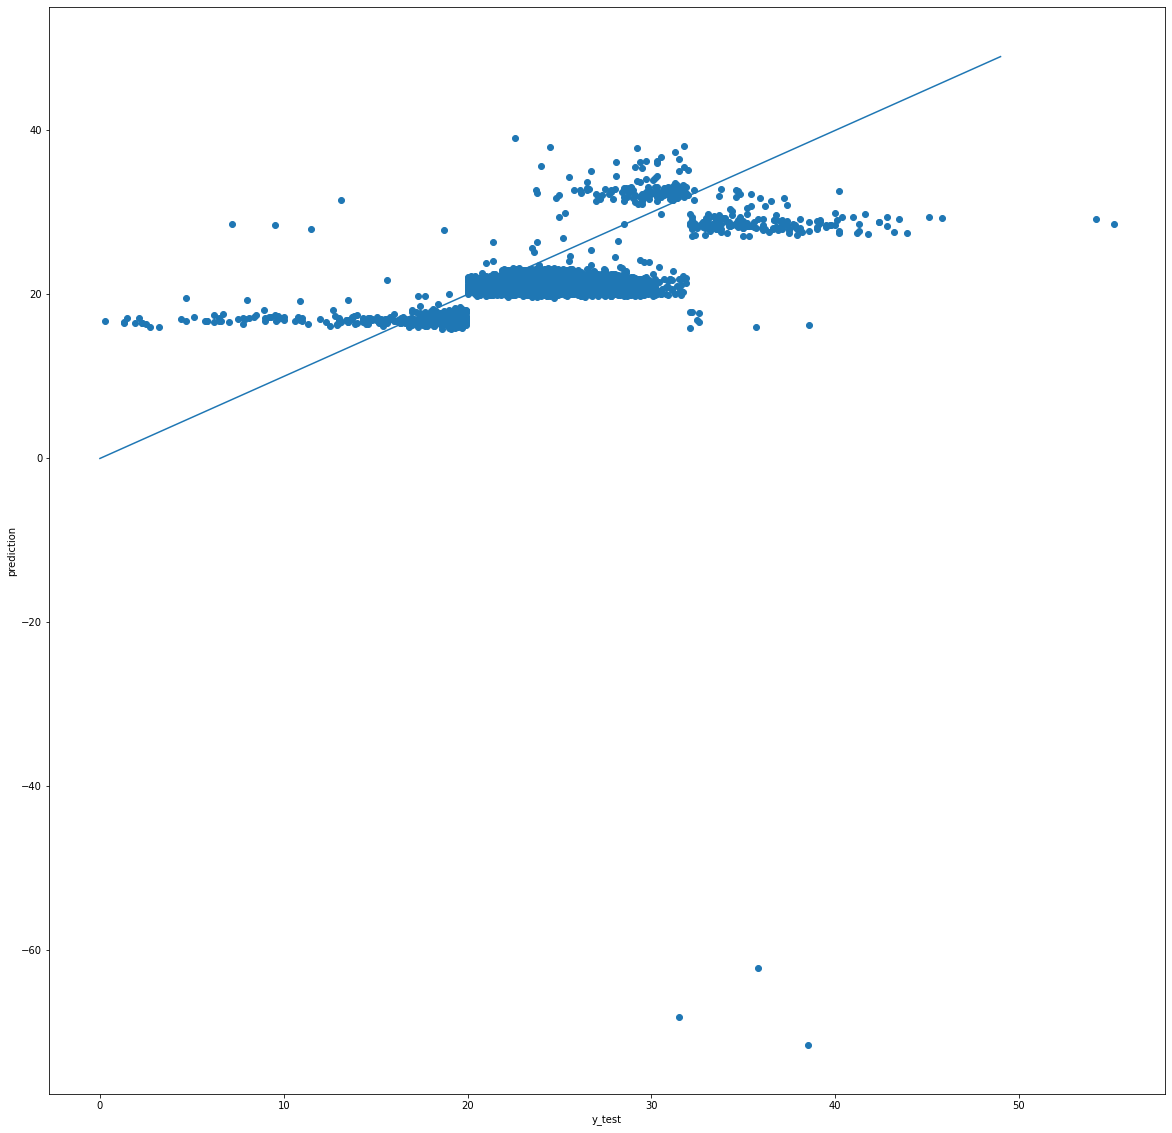

In [118]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')
x_=range(50)
y_=x_
plt.plot(x_,y_)

### 6. 사이킷런의SVR 모델을 불러온 후 아래 params로 예측을 진행하시오.
- kernel: rbf
- C: 50
- epsilon: 0.1

SVR모델에 적용해 fit한 후 X_test를 예측하여 y_predict란 이름에 저장하시오.
그리고 이 모델의 RMSE를 출력하시오.

In [121]:
from sklearn.svm import SVR
model=SVR(kernel='rbf',C=50,epsilon=0.1).fit(X_train,y_train)
y_predict=model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
rmse

2.0465823385937805

y_test와 y_predict의 관계를 그래프로 나타내시오.

Text(0, 0.5, 'y_predict')

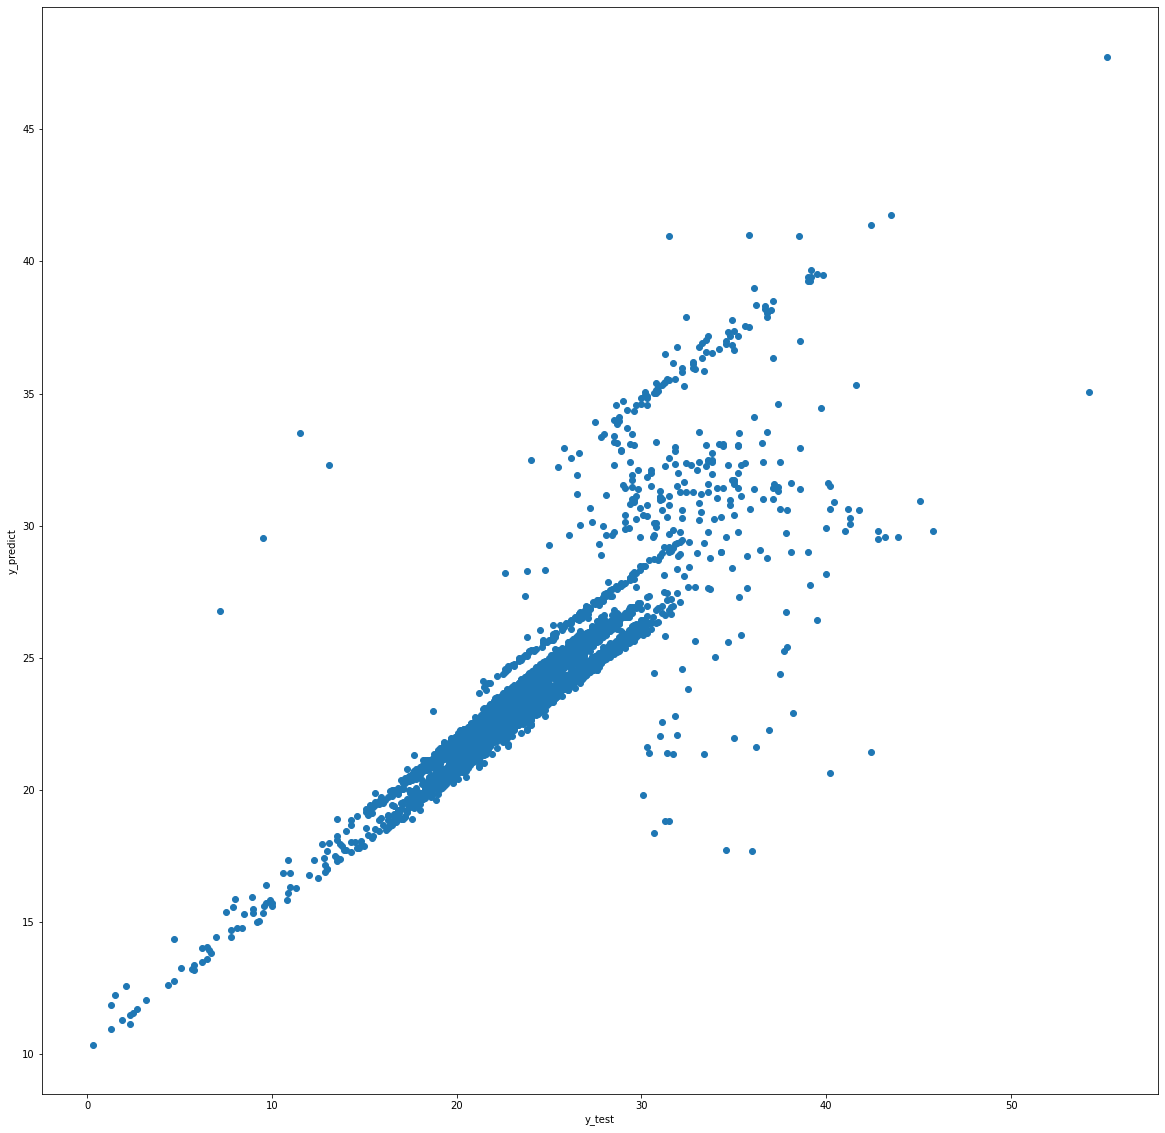

In [122]:
plt.scatter(y_test,y_predict)
plt.xlabel('y_test')
plt.ylabel('y_predict')

y_predict가 20 미만이거나 32 초과인 데이터는 1, 아니면 0으로 분류하시오.
그리고 X_test 데이터 셋에 y_faulty_predict 칼럼으로 추가하시오.

In [125]:
condition=(y_predict<20) | (y_predict<32)
new_col=np.where(condition, 1, 0)
X_test['y_faulty_predict']=new_col
X_test.head()

,fix_time,a_speed,b_speed,separation,s_separation,rate_terms,mpa,load_time,highpressure_time,y_falty,y_faulty_predict
6282,85.3,0.597,1.549,250.3,651.3,81,78.4,18.1,58,0,1
6009,85.3,0.597,1.579,250.4,651.3,81,78.1,18.2,61,0,1
22865,80.9,0.658,1.724,185.6,711.3,86,76.9,19.2,73,0,1
7658,86.0,0.603,1.657,253.6,651.5,80,77.4,18.2,64,1,1
14365,80.6,0.656,1.480,185.7,717.1,87,74.0,19.2,78,0,1


### 7. 5- 6번 실습을 기반으로 LinearSVR과 SVR 모델을 비교하여 간단히 서술하시오.

답 : rmse값을 비교했을 때, 그리고 y_test와 predict 그래프를 그려보았을 때에도, LinearSVR 모델보다 SVR 모델이 더 적합함을 알 수 있다. 즉 비선형 회귀모형이 더 적합함을 알 수 있다.

### 뽀너스: Decision boundary 예제
출처:  https://jeongmin-lee.tistory.com/87 

In [128]:
# mglearn 이 없다는 경고문이 발생할 시 아래 코드를 실행해주세요.
# pip install mglearn

학습용 데이터로 측정한 정확도 = 0.81
시험용 데이터로 측정한 정확도 = 0.77


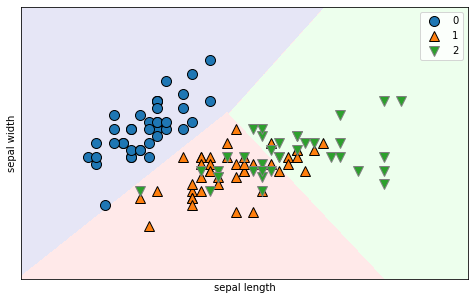

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
%matplotlib inline

iris = load_iris()

# 시각화를 위해서 sepal length와 width만 사용한다.
x = iris['data'][:, [0,1]] # column 0과 1만 사용
y = iris['target']

# train 데이터 세트와 test 데이터 세트를 구성한다.
trainX, testX, trainY, testY = \
    train_test_split(x, y, test_size=0.2)

# SVM으로 Train 데이터 세트를 학습한다.
svm = SVC(kernel='linear')
svm.fit(trainX, trainY)

# 정확도를 계산한다.
print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(trainX, trainY))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(testX, testY))

# 시각화
plt.figure(figsize=(8, 5))
mglearn.plots.plot_2d_classification(svm, trainX, alpha=0.1)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()